In [1]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np

import math

In [18]:
# Purpose of Kalman filter is to predict compartment variables from noisy measurements 

# generate some data (given that measruements are noisy)
# measures used for updating current rends
# motions used to predict future trends

measures = [10, 14, 18, 19, 23, 24]
motions = [1, 1, 1, 2, 1, 2]

# parameters
# In Kalman filters, iterate measurement through Bayes rule (multiplication) and iterate through motion with probability (addition)
    # purpose of this is to shift the mean
meas_sig = 4
mot_sig = 2
mean = 0
sig = 10000

# need to find variance (Guassian spread) 
print("(mean, variance)")
for i in range(len(measures)):
    # update the measurement by taking in two means and two squared variance terms and returning udpated gaussian param
    mean = (meas_sig * mean + measures[i] * sig) / (meas_sig + sig) # new mean is just the weighted sum of old means
    var = 1/(1/meas_sig + 1/sig) # variance used to caclulate by previous variances
    
    print('Measurement Update ({}, {})'.format(mean, var))
    
    # predict the motion update by doing similar to above but after motion
    mean = mean + motions[i] # get new mean by just adding the motion to old mean
    var = var + mot_sig # similar to var
    
    print('Motion Update ({}, {})'.format(mean, var))
    

(mean, variance)
Measurement Update (9.996001599360255, 3.9984006397441023)
Motion Update (10.996001599360255, 5.998400639744102)
Measurement Update (13.99879888108731, 3.9984006397441023)
Motion Update (14.99879888108731, 5.998400639744102)
Measurement Update (17.998799999552617, 3.9984006397441023)
Motion Update (18.998799999552617, 5.998400639744102)
Measurement Update (18.999999520191743, 3.9984006397441023)
Motion Update (20.999999520191743, 5.998400639744102)
Measurement Update (22.999200319680206, 3.9984006397441023)
Motion Update (23.999200319680206, 5.998400639744102)
Measurement Update (23.99999968025577, 3.9984006397441023)
Motion Update (25.99999968025577, 5.998400639744102)


Final (25.99999968025577, 5.998400639744102)


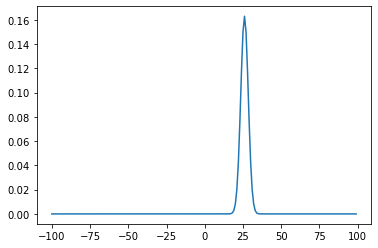

In [24]:
# display the final resulting Gaussian and by setting resulting params as result of Kalman filter
print("Final ({}, {})".format(mean, var))

# intialize some values for the x axis of this graph
x = np.arange(-100, 100)

y = []
for i in x:
    # turn into gaussian (continous function where location underneath sums up to 1
    coeff = 1/math.sqrt(2 * math.pi * var)
    expon = math.exp(-0.5 * (i - mean) ** 2 / var)
    y.append(coeff * expon)
    
plt.plot(x, y)
plt.show()